# Optimization via Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
np.seterr(all='raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

In [3]:
def gd(fn, grad_fn, x0, k_max, tol_f, tol_x, alpha=None):
    curr_x, prev_x = x0, np.inf
    curr_k = 0
    grad_x0, curr_grad = grad_fn(x0), grad_fn(curr_x)
    history_x = [x0]
    history_f = [fn(x0)]
    history_grad = [grad_x0]
    history_err = [np.linalg.norm(grad_x0, 2)]
    use_backtracking = alpha is None

    while (curr_k < k_max and 
            not (np.linalg.norm(curr_grad, 2) < tol_f*np.linalg.norm(grad_x0, 2)) and
            not (np.linalg.norm(curr_x - prev_x, 2) < tol_x)):
        if use_backtracking:
            alpha = backtracking(fn, grad_fn, curr_x)
        prev_x = curr_x
        curr_x = curr_x - alpha*grad_fn(curr_x)

        curr_grad = grad_fn(curr_x)
        curr_k += 1
        
        history_x.append(curr_x)
        history_f.append(fn(curr_x))
        history_grad.append(curr_grad)
        history_err.append(np.linalg.norm(curr_grad, 2))

    return history_x, curr_k, history_f, history_grad, history_err

## Tests definition

In [4]:
def testVaryingAlpha(fn, grad_fn, input_size, x_true, scale="linear", k_max=100, try_alpha=[0.01, 0.1, 0.2, 0.5, None]):
    plt.figure(figsize=(18, 4))
    plt.suptitle(f"Varying alpha (scale: {scale})")
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)
    for alpha in try_alpha:
        try:
            history_x, curr_k, history_f, history_grad, history_err = gd(fn, grad_fn, np.zeros((input_size,)), k_max, 1e-6, 1e-6, alpha)
            ax1.plot(range(0, len(history_err)), history_err, label=f"alpha={alpha}")
            ax2.plot(range(0, len(history_x)), [np.linalg.norm(x - x_true, 2) for x in history_x], label=f"alpha={alpha}")
        except Exception as e:
            print(f"alpha={alpha}: {e}")
    ax1.set_xlabel("Iter")
    ax1.set_ylabel("Gradient norm")
    ax1.set_yscale(scale)
    ax1.legend()
    ax2.set_xlabel("Iter")
    ax2.set_ylabel("Predicted point error")
    ax2.set_yscale(scale)
    ax2.legend()
    plt.show()

def testVaryingX0(fn, grad_fn, input_size, x_true, scale="linear", k_max=100, try_x0=None):
    if try_x0 is None: 
        try_x0 = [ np.zeros((input_size,)), np.ones((input_size,)), -np.ones((input_size,)) ]
    plt.figure(figsize=(18, 4))
    plt.suptitle(f"Varying x0 (scale: {scale})")
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)
    for x0 in try_x0:
        history_x, curr_k, history_f, history_grad, history_err = gd(fn, grad_fn, x0, k_max, 1e-6, 1e-6, None)
        ax1.plot(range(0, len(history_err)), history_err, label=f"x0={np.round(x0, 2)}")
        ax2.plot(range(0, len(history_x)), [np.linalg.norm(x - x_true, 2) for x in history_x], label=f"x0={np.round(x0, 2)}")
    ax1.set_xlabel("Iter")
    ax1.set_ylabel("Gradient norm")
    ax1.set_yscale(scale)
    ax1.legend()
    ax2.set_xlabel("Iter")
    ax2.set_ylabel("Predicted point error")
    ax2.set_yscale(scale)
    ax2.legend()
    plt.show()

def testVaryingTolerance(fn, grad_fn, input_size, x_true, scale="linear", k_max=100, try_tol=[1e-9, 1e-8, 1e-7, 1e-6, 1e-4, 1e-3, 1e-2, 1e-1, 1]):
    plt.figure(figsize=(18, 4))
    plt.suptitle(f"Varying tolerance (scale: {scale})")
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)
    for tol in try_tol:
        history_x, curr_k, history_f, history_grad, history_err = gd(fn, grad_fn, np.zeros((input_size,)), k_max, tol, tol, None)
        ax1.plot(range(0, len(history_err)), history_err, label=f"tol={tol}", linewidth=5)
        ax2.plot(range(0, len(history_x)), [np.linalg.norm(x - x_true, 2) for x in history_x], label=f"tol={tol}", linewidth=5)
    ax1.set_xlabel("Iter")
    ax1.set_ylabel(f"Gradient norm")
    ax1.set_yscale(scale)
    ax1.legend()
    ax2.set_xlabel("Iter")
    ax2.set_ylabel("Predicted point error")
    ax2.set_yscale(scale)
    ax2.legend()
    plt.show()


def showContour(fn, grad_fn, x_true, x0, k_max, tol_f, tol_x, alpha=None, contour_area=(-10, 10)):
    history_x, curr_k, history_f, history_grad, history_err = gd(fn, grad_fn, x0, k_max, tol_f, tol_x, alpha)

    x = np.linspace(contour_area[0], contour_area[1], 1000)
    y = np.linspace(contour_area[0], contour_area[1], 1000)
    x_contour, y_contour = np.meshgrid(x, y)
    z_contour = fn((x_contour, y_contour))

    history_f.sort()
    to_visualize_levels = [history_f[0]] + [history_f[i] for i in range(1, len(history_f)) if (history_f[i]-history_f[i-1]) >= 0.05]
    # to_visualize_levels = history_f
    contour_graph = plt.contour(x, y, z_contour, levels=to_visualize_levels)
    plt.clabel(contour_graph, inline=1, fontsize=10)
    plt.scatter([a[0] for a in history_x], [a[1] for a in history_x], marker="o")
    plt.scatter(x_true[0], x_true[1], marker="x", c="red", label="Optima")
    plt.legend()
    plt.show()

In [5]:
def testCase1():
    def f(x):
        x1, x2 = x
        return (x1 - 3)**2 + (x2 - 1)**2

    def grad_f(x):
        x1, x2 = x
        return np.array([ 2*(x1-3), 2*(x2-1) ])
    
    return f, grad_f, np.array([3, 1]), 2


def testCase2():
    def f(x):
        x1, x2 = x
        return 10*(x1 - 1)**2 + (x2 - 2)**2

    def grad_f(x):
        x1, x2 = x
        return np.array([ 20*(x1-1), 2*(x2-2) ])
    
    return f, grad_f, np.array([1, 2]), 2


def testCase3(n=5):
    x_true = np.ones((n,))
    A = np.vander(np.linspace(0, 1, n))
    b = A @ x_true

    def f(x):
        return (1/2) * np.linalg.norm(A@x - b, 2)**2

    def grad_f(x):
        return (x.T @ A.T @ A - b.T @ A)
    
    return f, grad_f, x_true, n


def testCase4(n=5, lamb=0.1):
    x_true = np.ones((n,))
    A = np.vander(np.linspace(0, 1, n))
    b = A @ x_true

    def f(x):
        return (1/2)*np.linalg.norm(A@x - b, 2)**2 + (lamb/2)*np.linalg.norm(x)**2

    def grad_f(x):
        return (x.T @ A.T @ A - b.T @ A) + (lamb*x.T)
    
    return f, grad_f, x_true, n


def testCase5():
    def f(x):
        return x**4 + x**3 - 2*x**2 - 2*x

    def grad_f(x):
        return 4*x**3 + 3*x**2 - 4*x - 2
    
    return f, grad_f, None, 1

## Test case 1

\begin{equation*}
    f(x_1, x_2) = (x_1 - 3)^2 + (x_2 - 1)^2
\end{equation*}

\begin{equation*}
    \nabla f(x_1, x_2) = \Big( 2(x_1-3), 2(x_2-1) \Big)
\end{equation*}

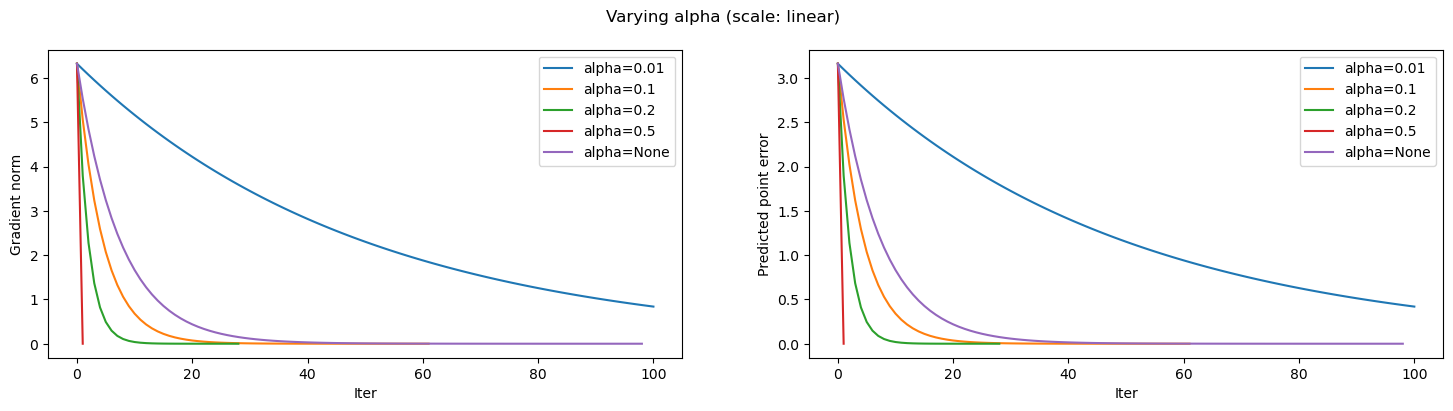

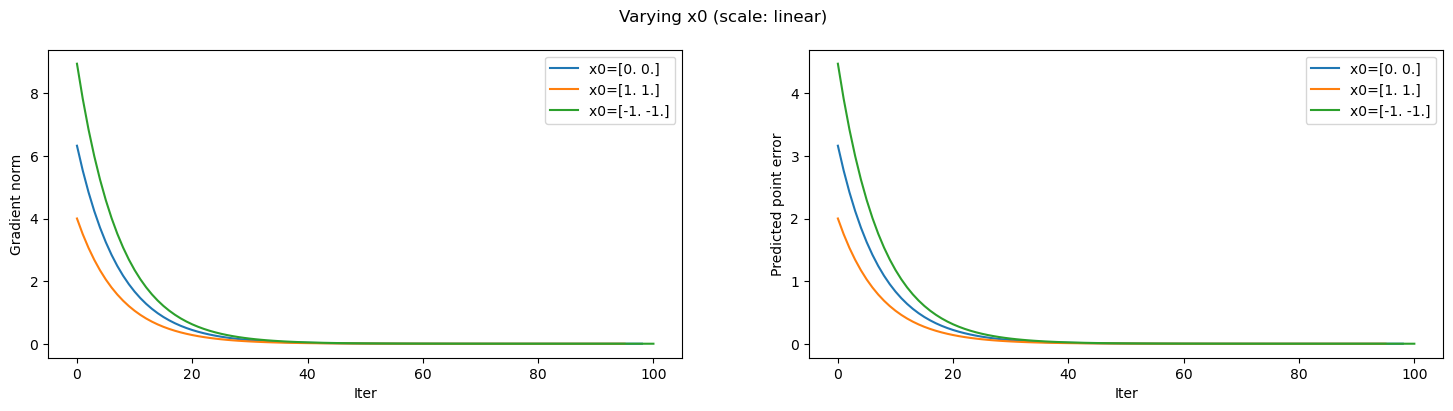

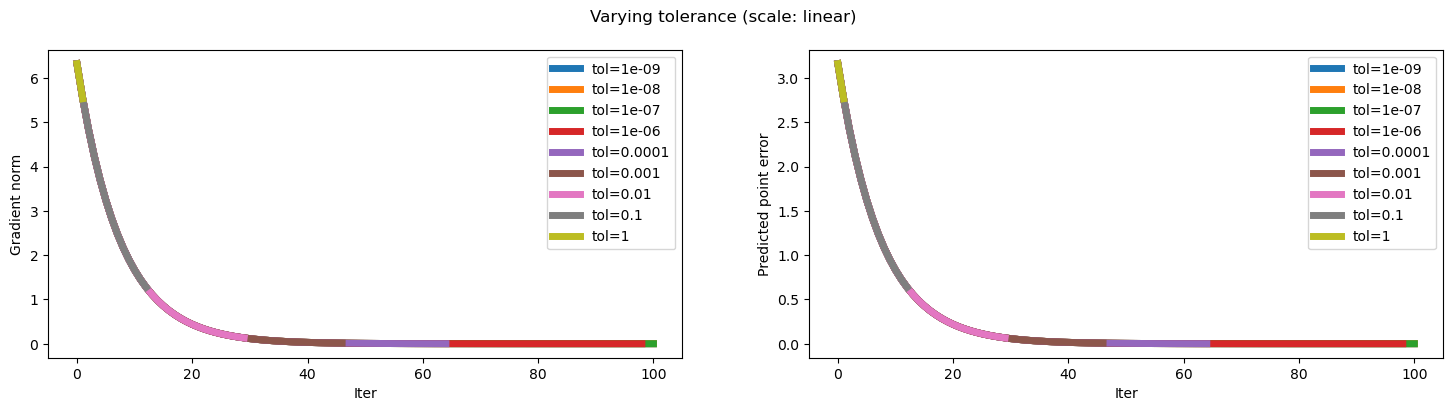

In [6]:
f, grad_f, x_true, input_size = testCase1()
testVaryingAlpha(f, grad_f, input_size, x_true)
testVaryingX0(f, grad_f, input_size, x_true)
testVaryingTolerance(f, grad_f, input_size, x_true)

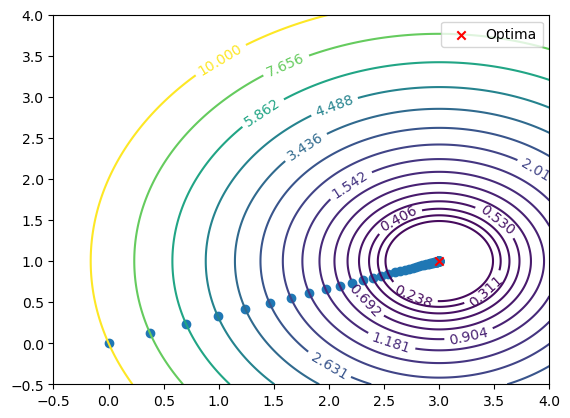

In [7]:
showContour(
    f, grad_f, x_true, 
    x0 = np.zeros((input_size,)),
    # x0 = np.array([8, 8]), 
    k_max = 200, 
    tol_f = 1e-6, 
    tol_x = 1e-6, 
    alpha = None,
    contour_area=(-0.5, 4)
)

## Test case 2

\begin{equation*}
    f(x_1, x_2) = 10(x_1 - 1)^2 + (x_2 - 2)^2
\end{equation*}

\begin{equation*}
    \nabla f(x_1, x_2) = \Big( 20(x_1 - 1), 2(x_2 - 2) \Big)
\end{equation*}

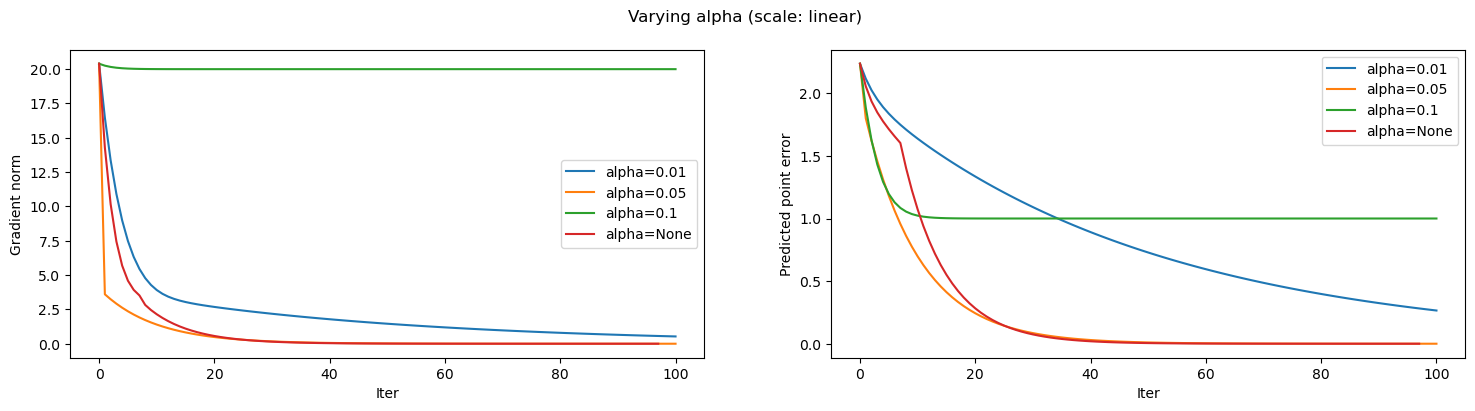

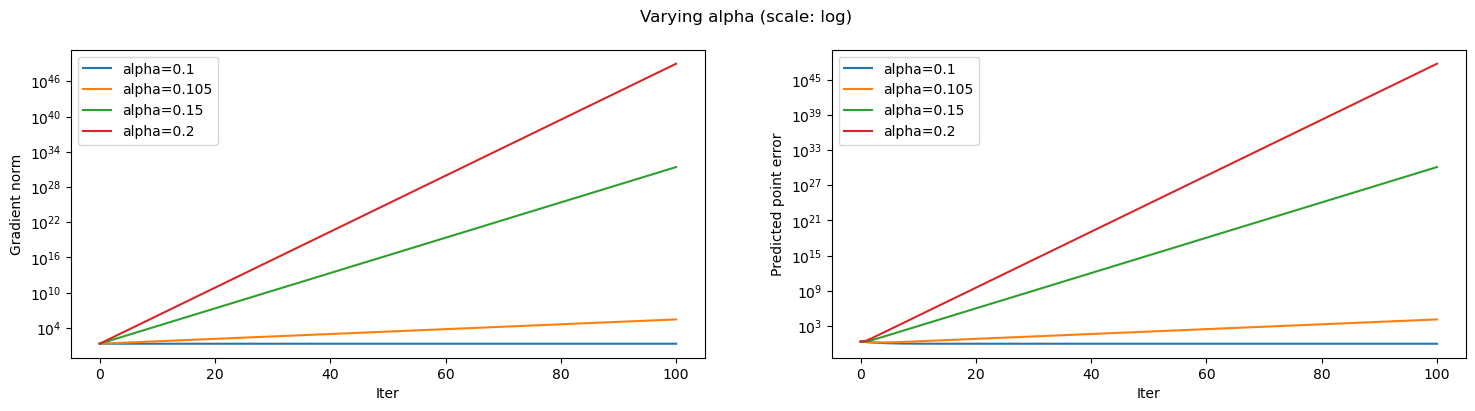

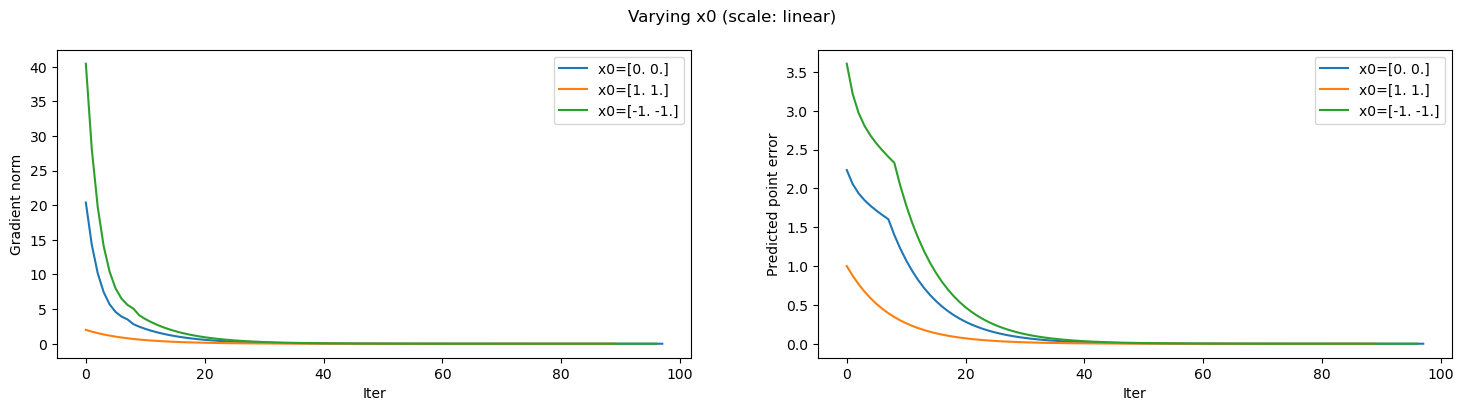

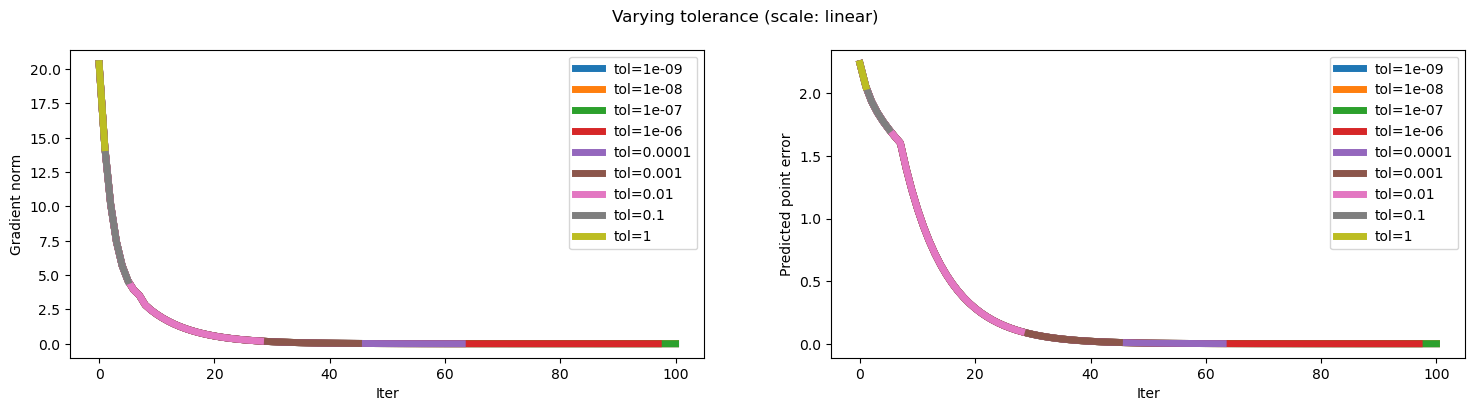

In [8]:
f, grad_f, x_true, input_size = testCase2()
testVaryingAlpha(f, grad_f, input_size, x_true, try_alpha=[0.01, 0.05, 0.1, None])
testVaryingAlpha(f, grad_f, input_size, x_true, try_alpha=[0.1, 0.105, 0.15, 0.2], scale="log")
testVaryingX0(f, grad_f, input_size, x_true)
testVaryingTolerance(f, grad_f, input_size, x_true)

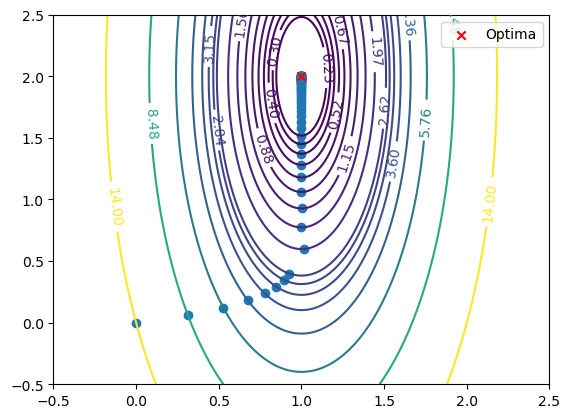

In [9]:
showContour(
    f, grad_f, x_true, 
    x0 = np.zeros((input_size,)),
    k_max = 200, 
    tol_f = 1e-6, 
    tol_x = 1e-6, 
    alpha = None,
    contour_area=(-0.5, 2.5)
)

## Test case 3

\begin{equation*}
    f(x) = \frac{1}{2} \Vert Ax - b \Vert^2_2
\end{equation*}

\begin{equation*}
    \nabla f(x) = x^T A^TA - b^T A
\end{equation*}

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
   n = 5
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


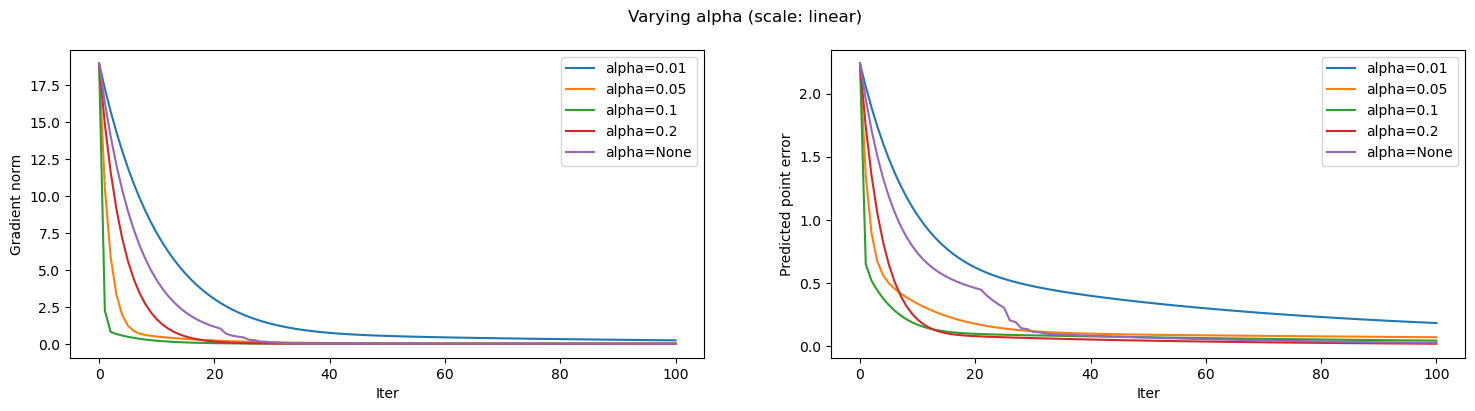

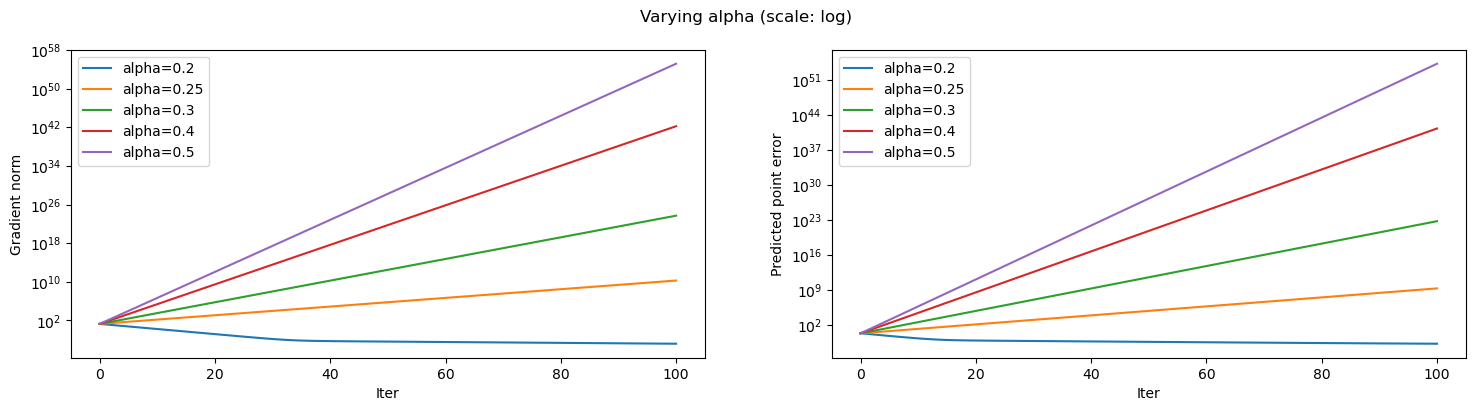

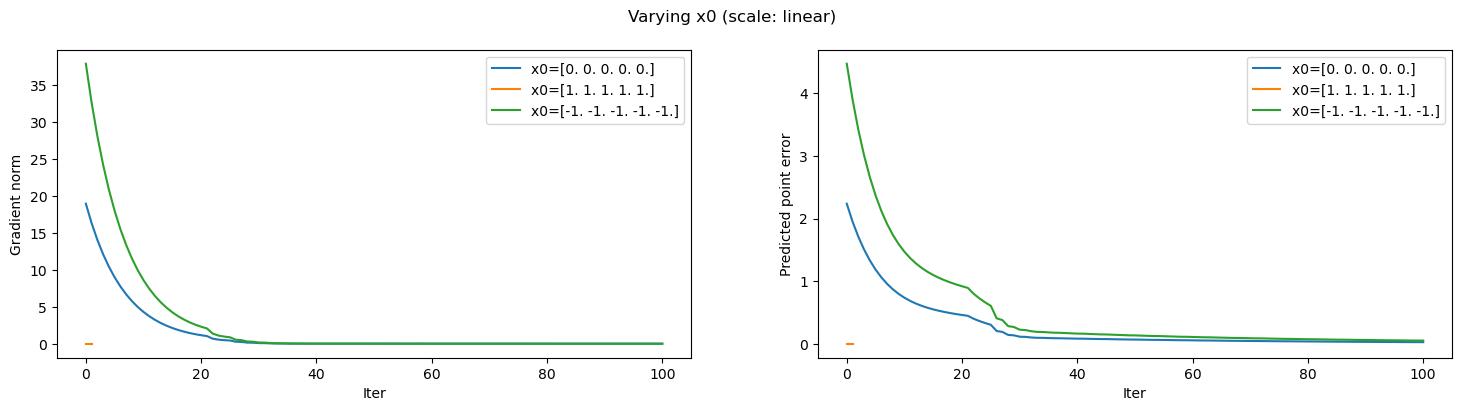

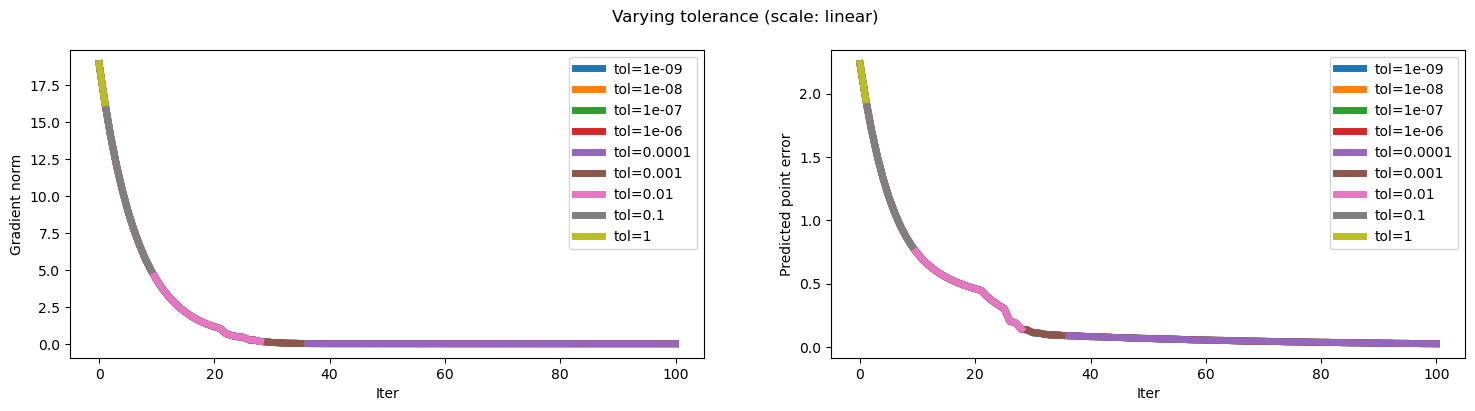

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
   n = 10
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


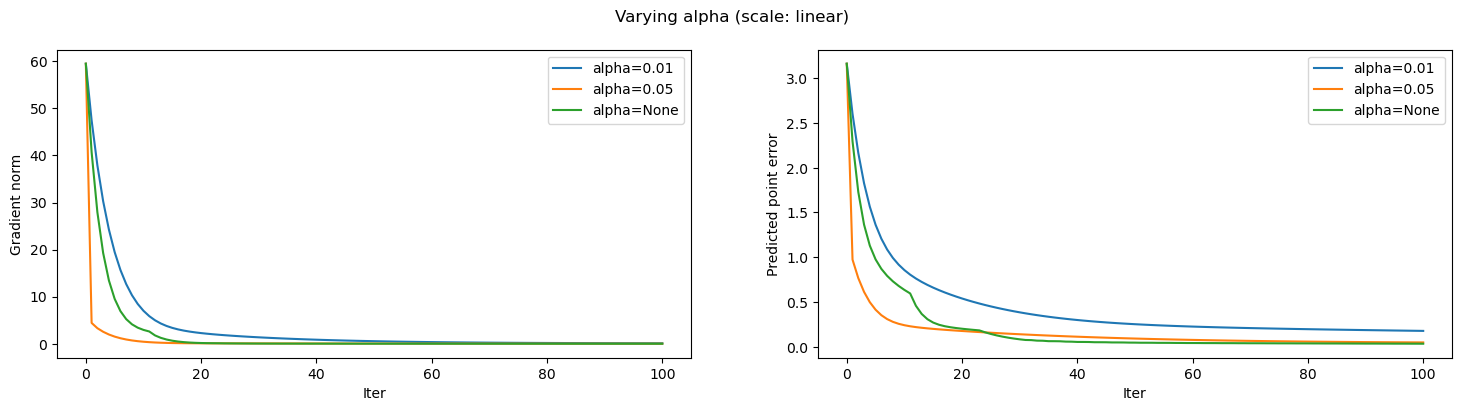

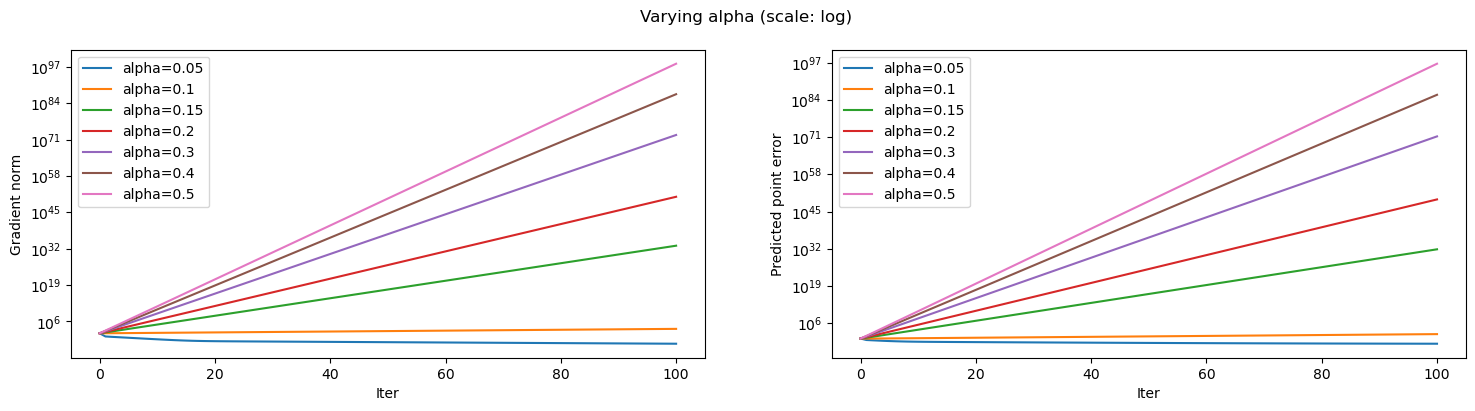

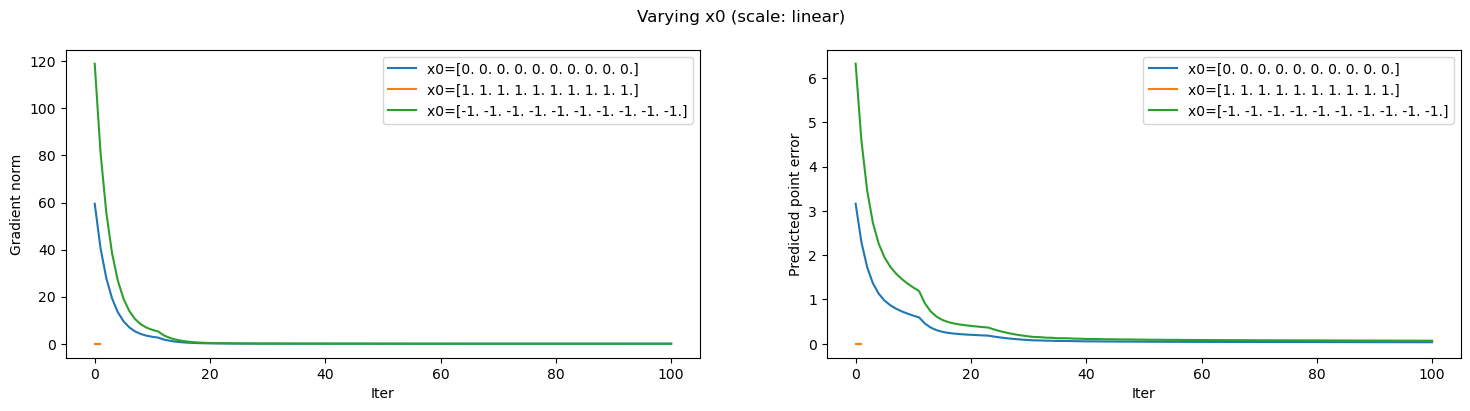

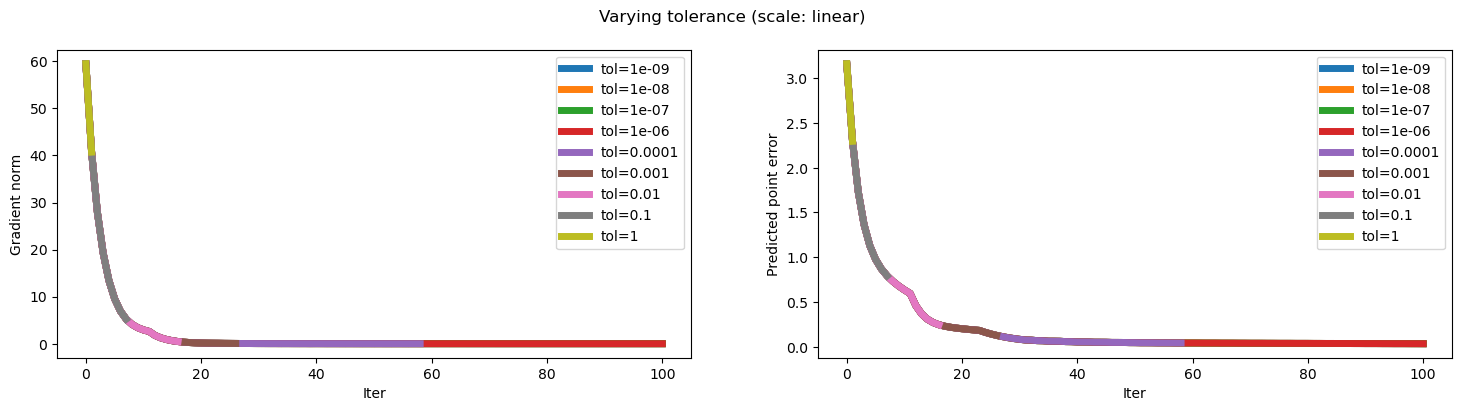

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
   n = 15
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


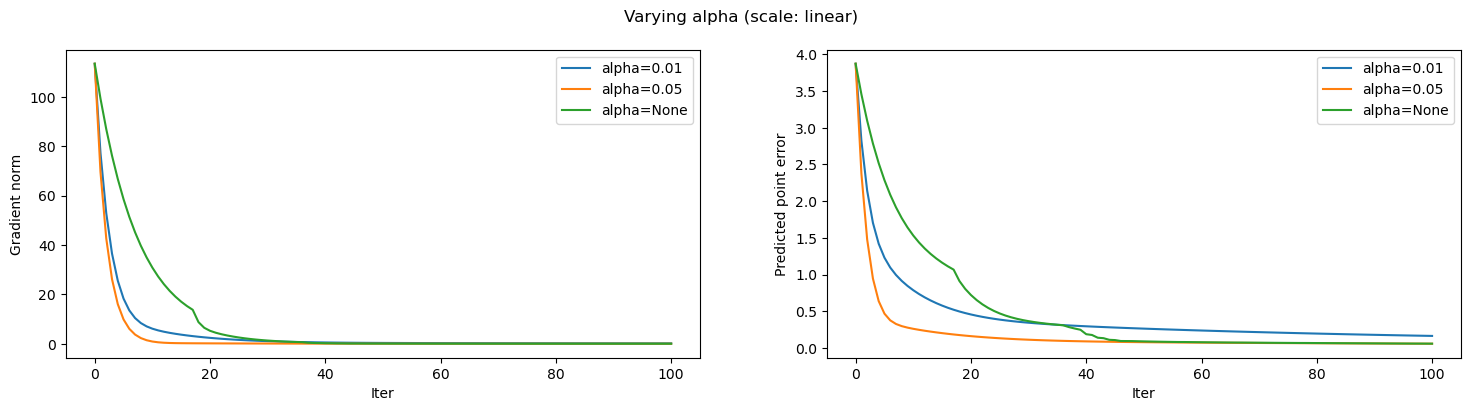

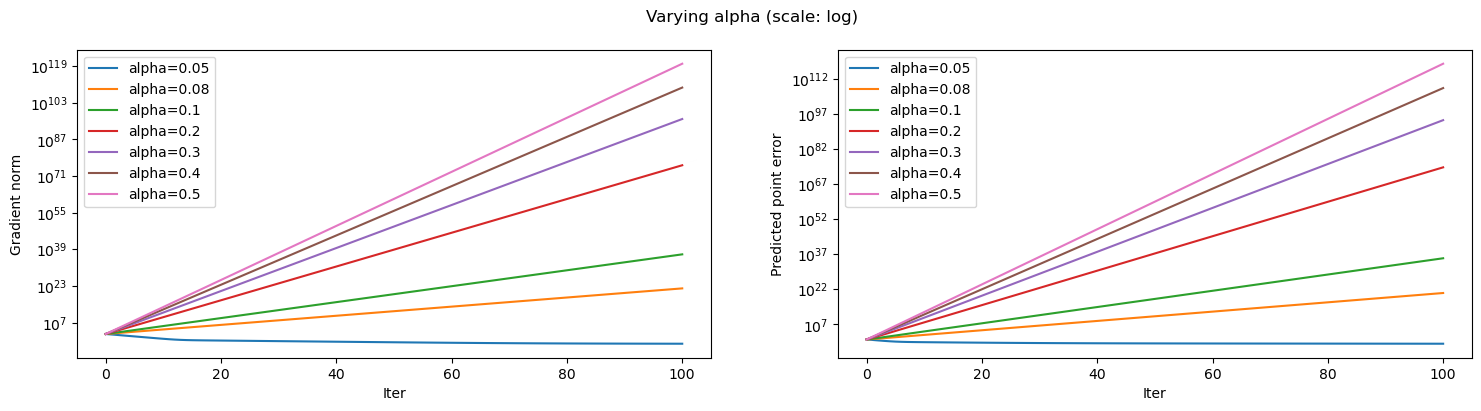

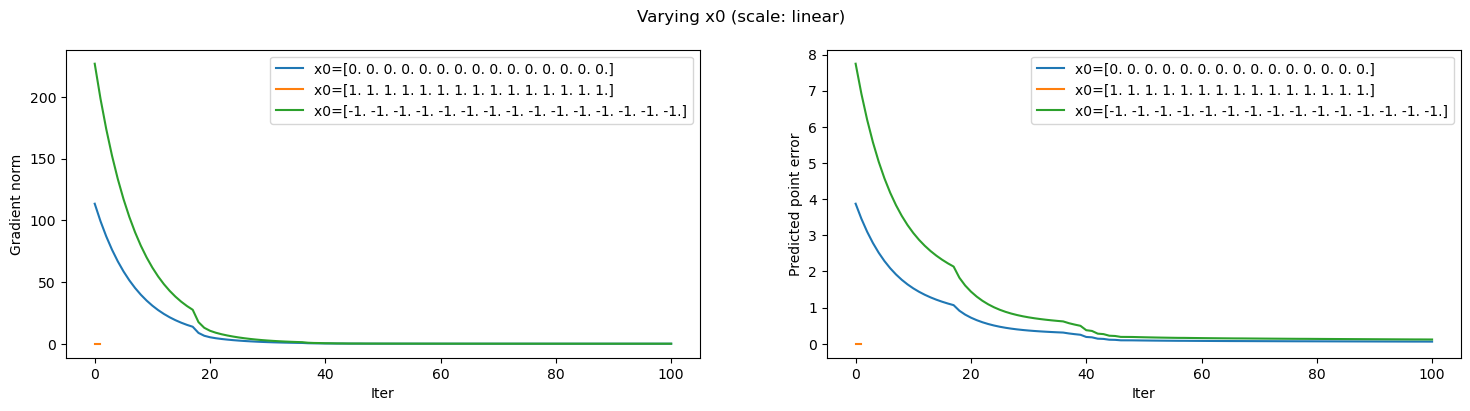

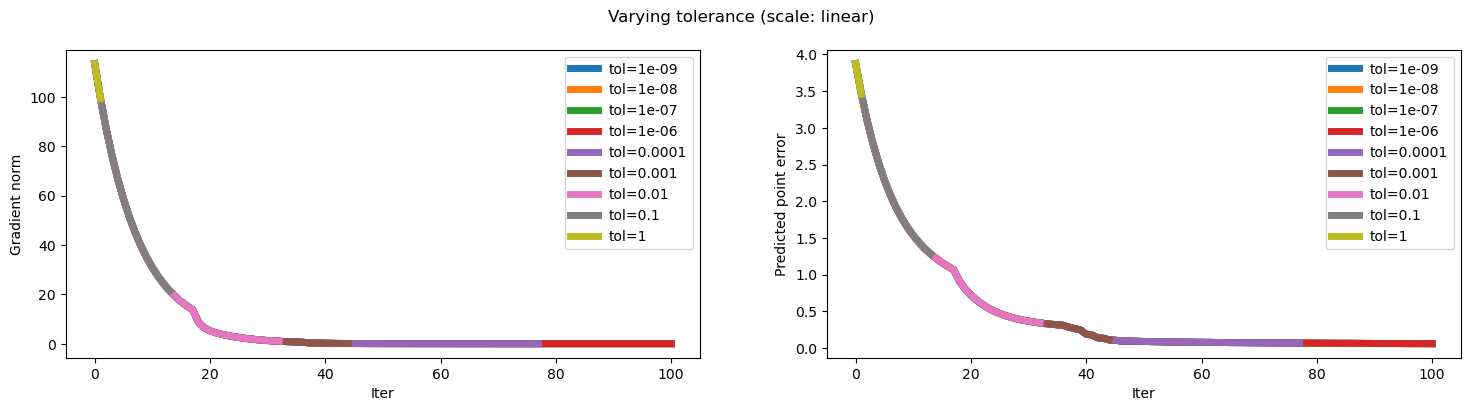

In [10]:
n = 5
print(f"{'>'*40}\n   n = {n}\n{'>'*40}")
f, grad_f, x_true, input_size = testCase3(n)
testVaryingAlpha(f, grad_f, input_size, x_true, try_alpha=[0.01, 0.05, 0.1, 0.2, None])
testVaryingAlpha(f, grad_f, input_size, x_true, try_alpha=[0.2, 0.25, 0.3, 0.4, 0.5], scale="log")
testVaryingX0(f, grad_f, input_size, x_true)
testVaryingTolerance(f, grad_f, input_size, x_true)

n = 10
print(f"{'>'*40}\n   n = {n}\n{'>'*40}")
f, grad_f, x_true, input_size = testCase3(n)
testVaryingAlpha(f, grad_f, input_size, x_true, try_alpha=[0.01, 0.05, None])
testVaryingAlpha(f, grad_f, input_size, x_true, try_alpha=[0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5], scale="log")
testVaryingX0(f, grad_f, input_size, x_true)
testVaryingTolerance(f, grad_f, input_size, x_true)

n = 15
print(f"{'>'*40}\n   n = {n}\n{'>'*40}")
f, grad_f, x_true, input_size = testCase3(n)
testVaryingAlpha(f, grad_f, input_size, x_true, try_alpha=[0.01, 0.05, None])
testVaryingAlpha(f, grad_f, input_size, x_true, try_alpha=[0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5], scale="log")
testVaryingX0(f, grad_f, input_size, x_true)
testVaryingTolerance(f, grad_f, input_size, x_true)

#### Vandermonde with different initialization

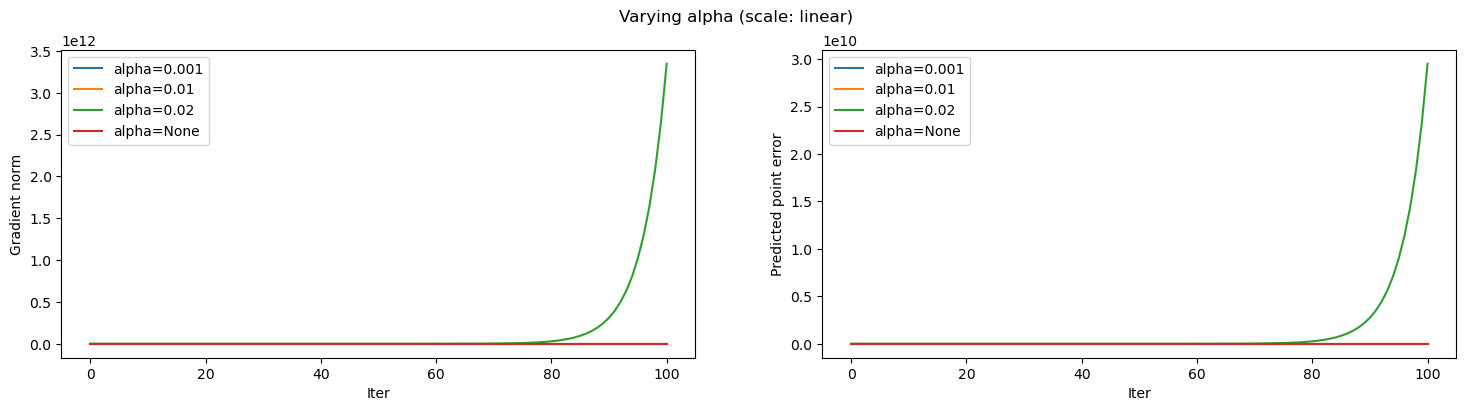

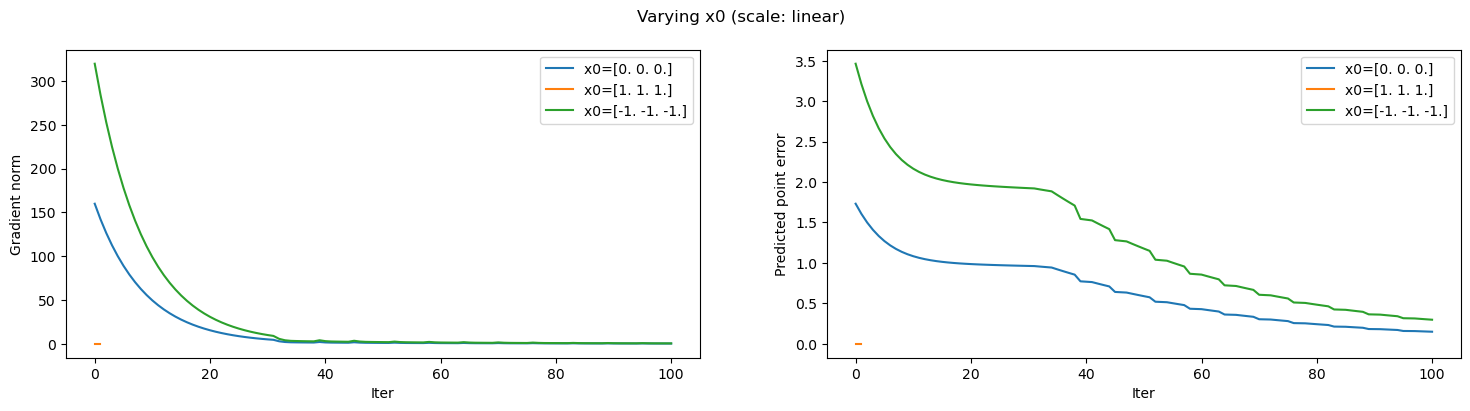

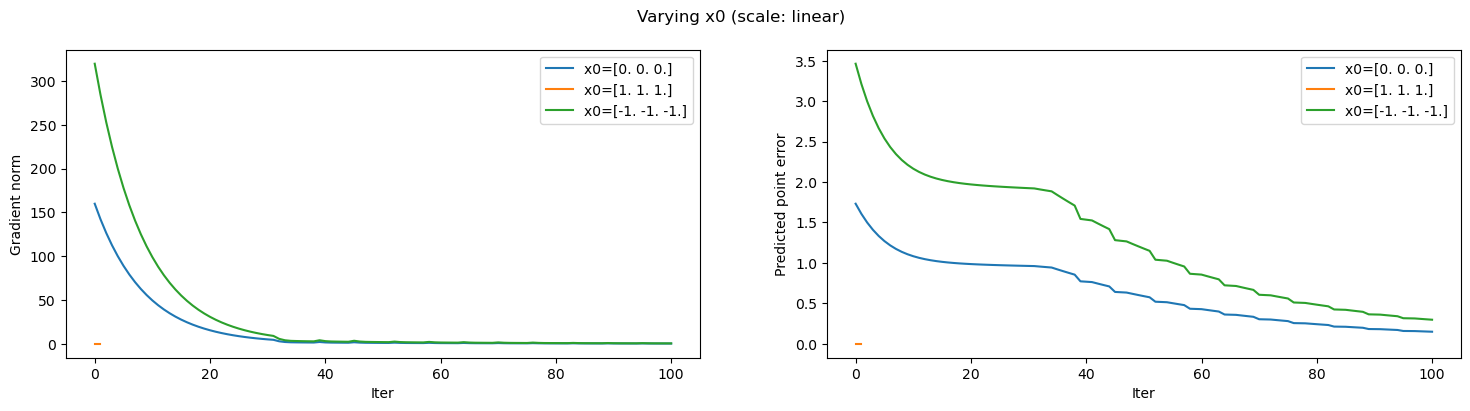

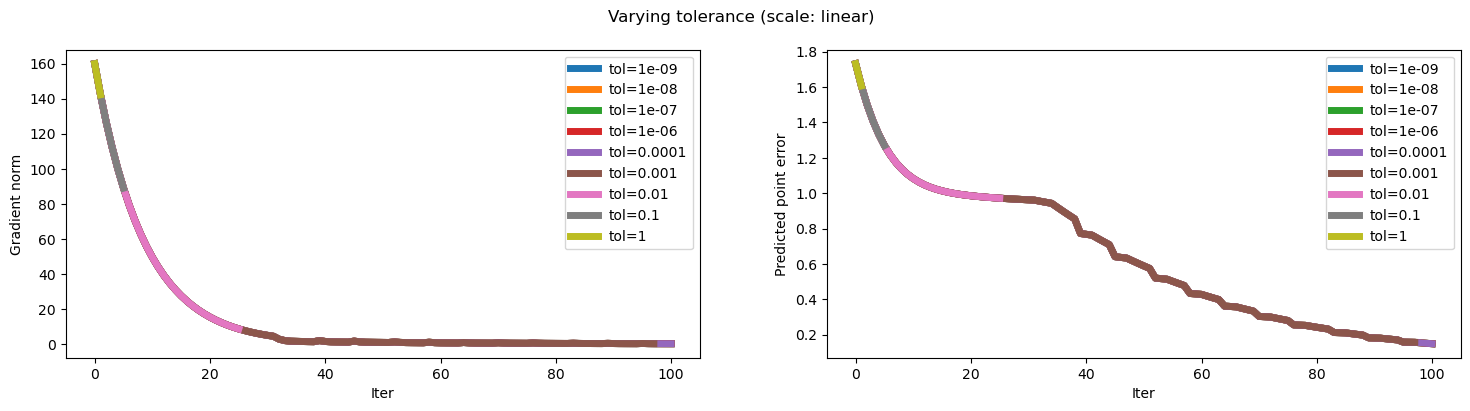

In [11]:
def testCase3_2(n):
    x_true = np.ones((n,))
    A = np.vander(range(1, n+1))
    b = A @ x_true

    def f(x):
        return (1/2) * np.linalg.norm(A@x - b, 2)**2

    def grad_f(x):
        return (x.T @ A.T @ A - b.T @ A)
    
    return f, grad_f, x_true, n


f, grad_f, x_true, input_size = testCase3_2(3)
testVaryingAlpha(f, grad_f, input_size, x_true, try_alpha=[0.001, 0.01, 0.02, None])
testVaryingX0(f, grad_f, input_size, x_true)
testVaryingX0(f, grad_f, input_size, x_true)
testVaryingTolerance(f, grad_f, input_size, x_true)

## Test case 4

\begin{equation*}
    f(x) = \frac{1}{2} \Vert Ax - b \Vert^2_2 + \frac{\lambda}{2} \Vert x \Vert^2_2
\end{equation*}

\begin{equation*}
    \nabla f(x) = (x^T A^TA - b^T A) + (\lambda x^T)
\end{equation*}

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
   n = 5
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


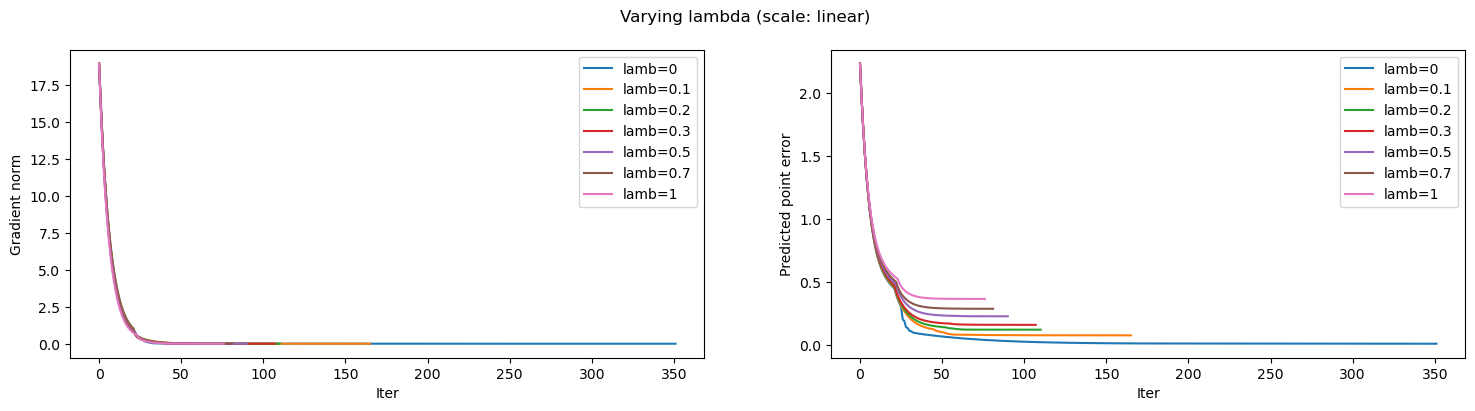

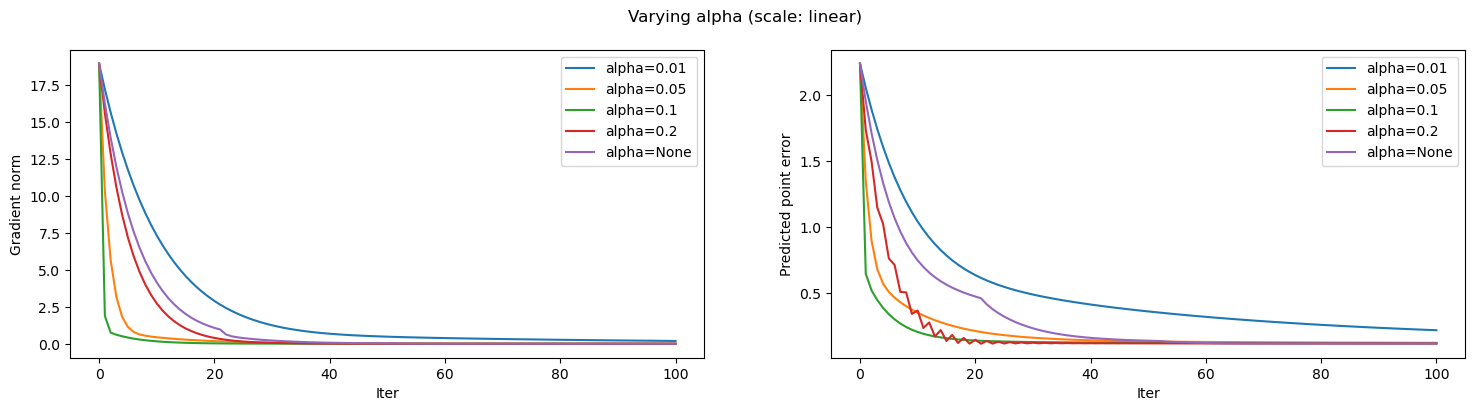

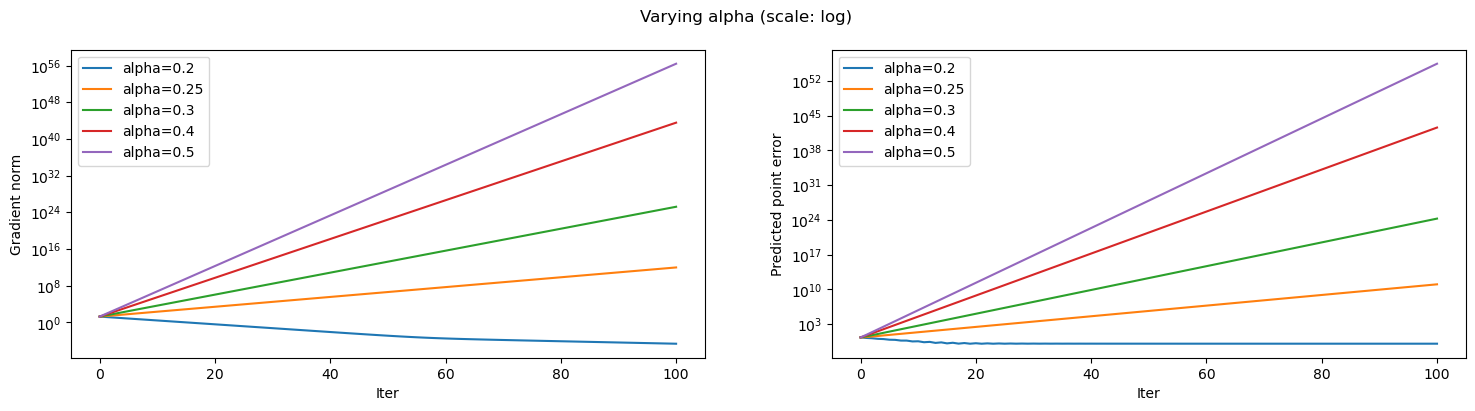

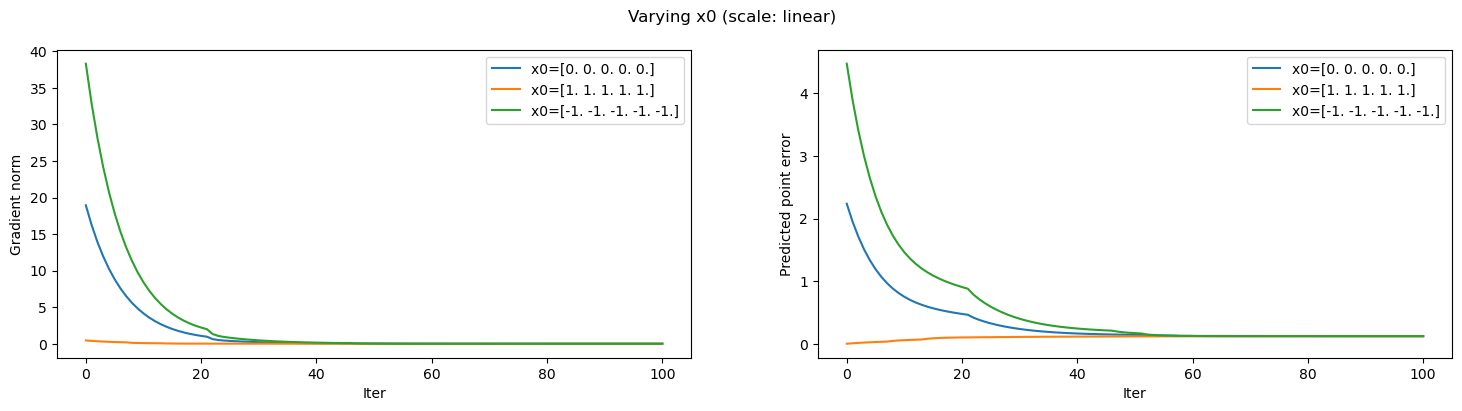

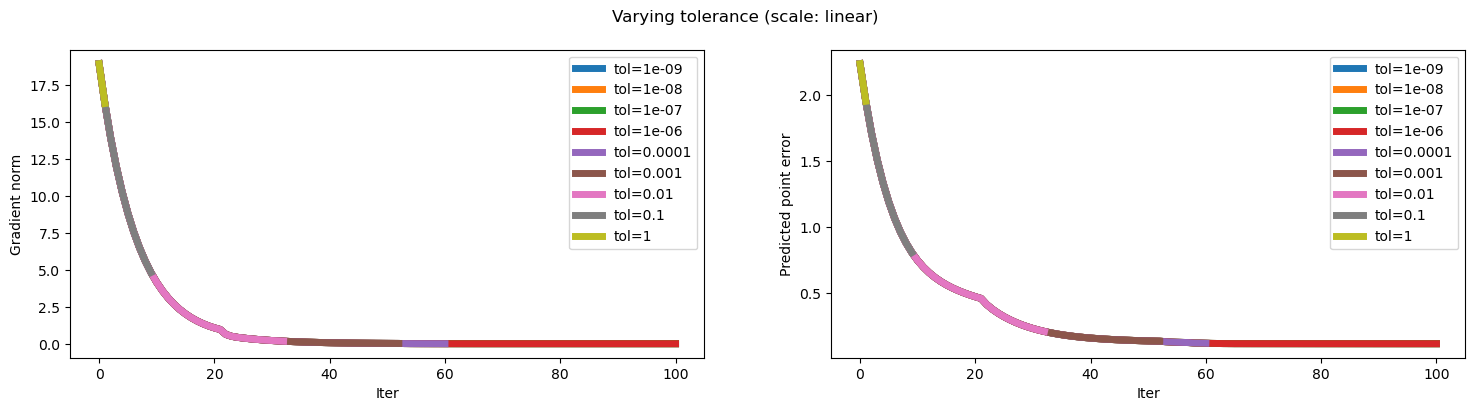

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
   n = 10
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


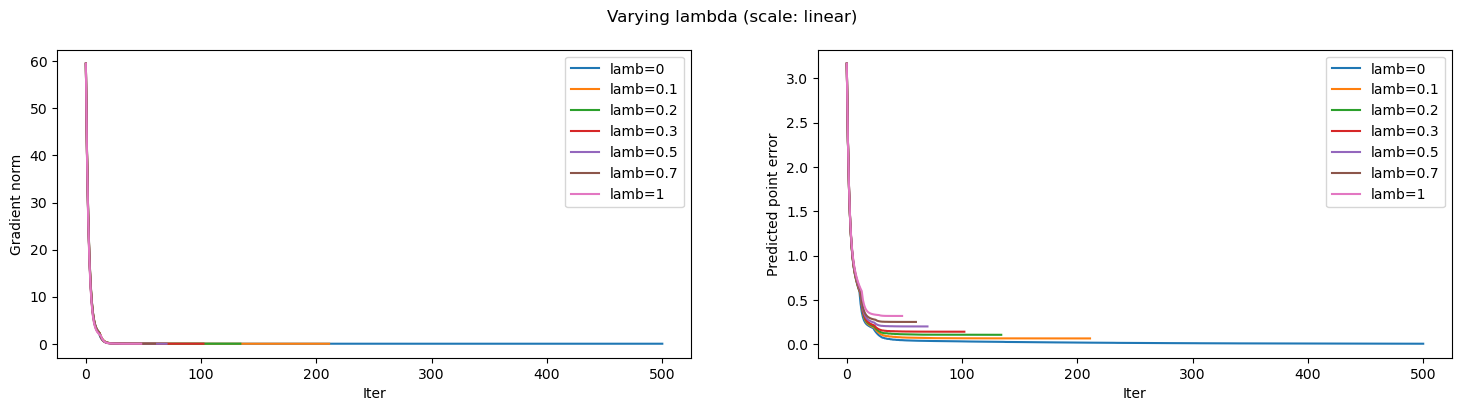

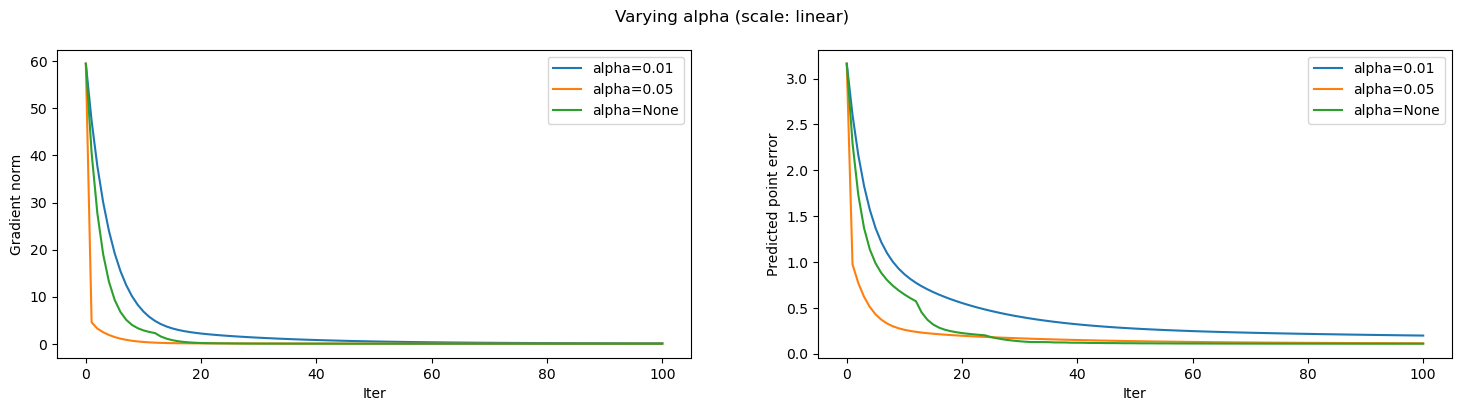

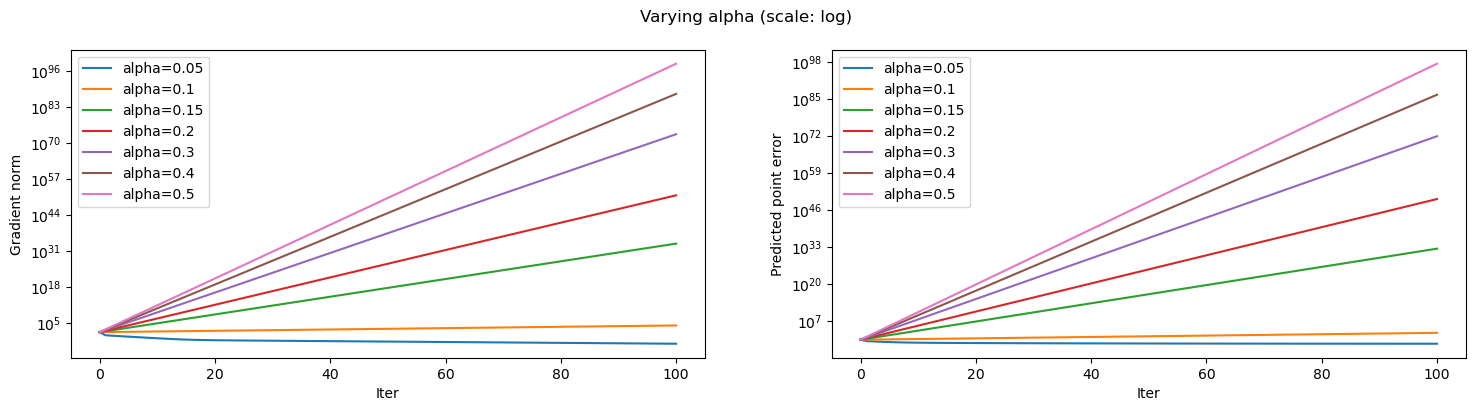

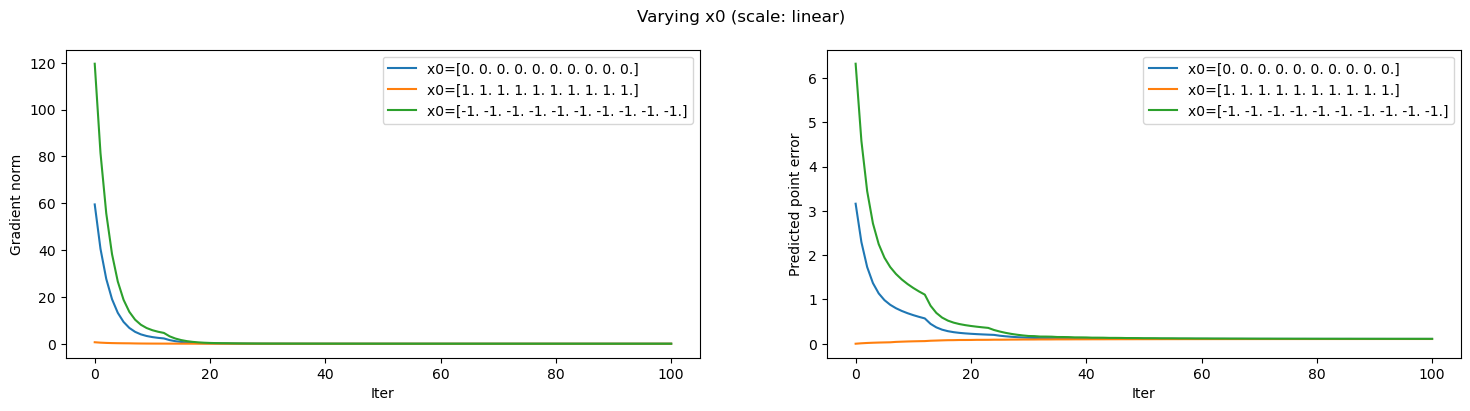

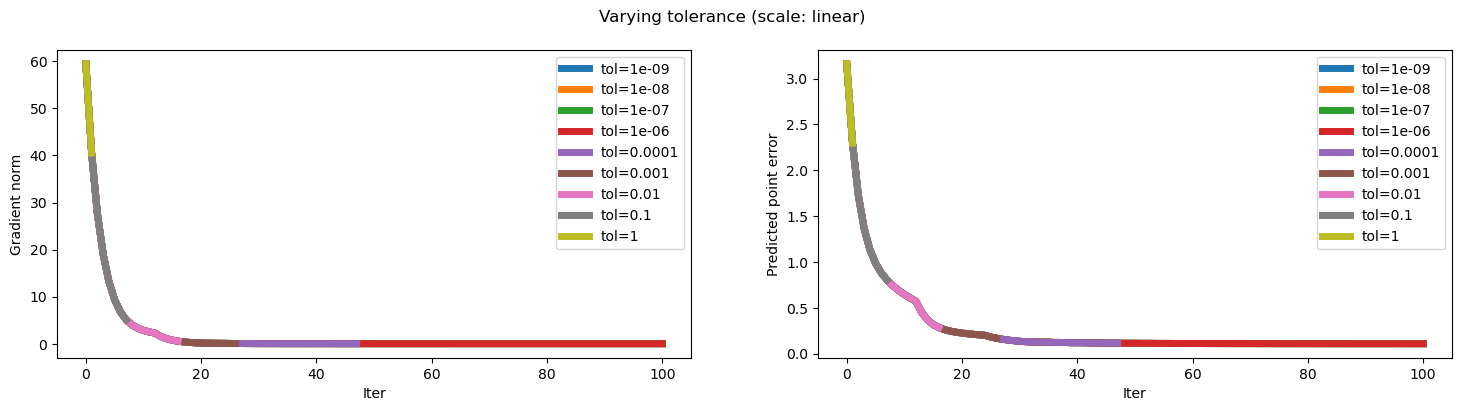

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
   n = 15
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


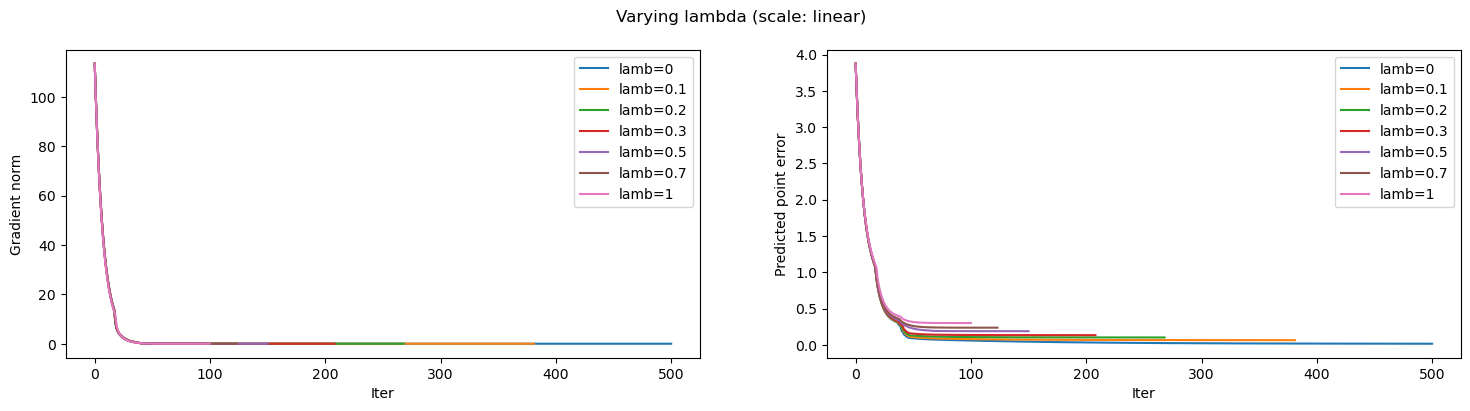

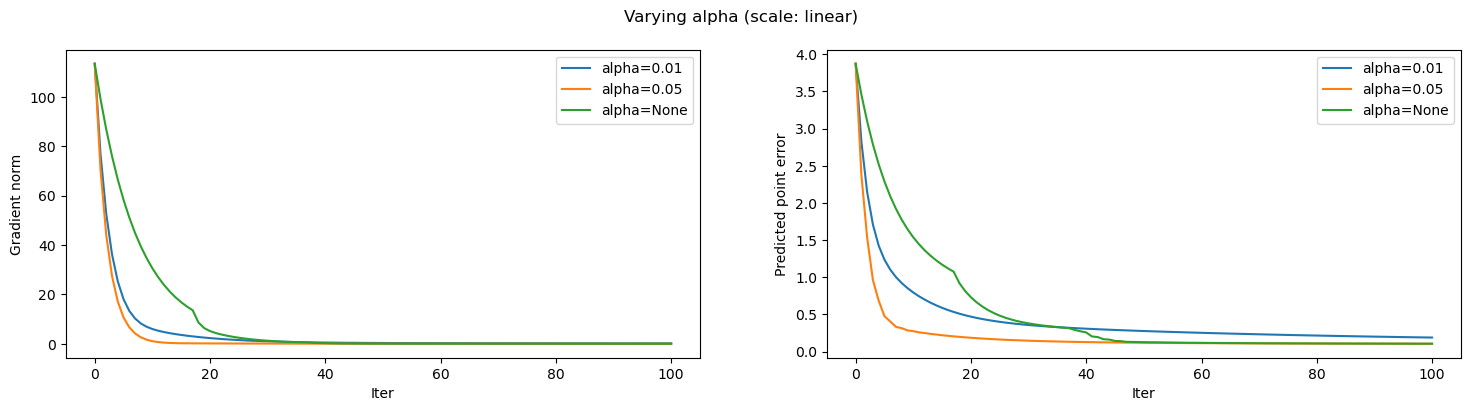

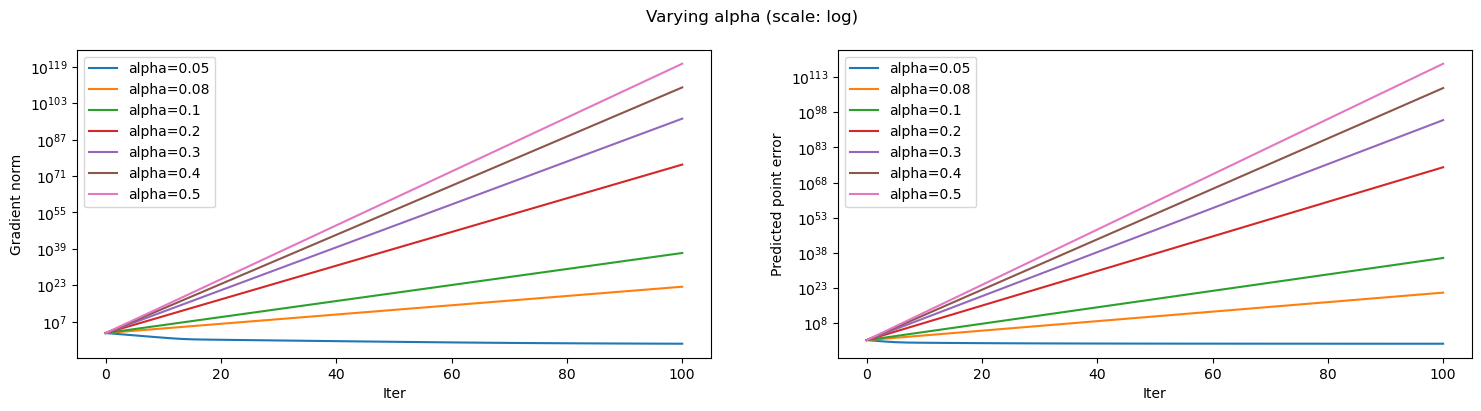

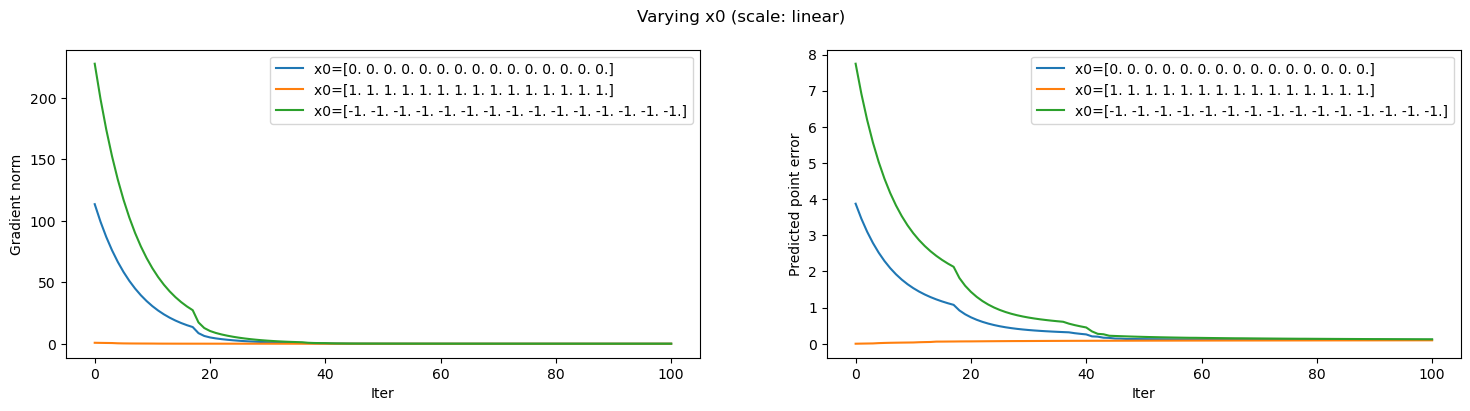

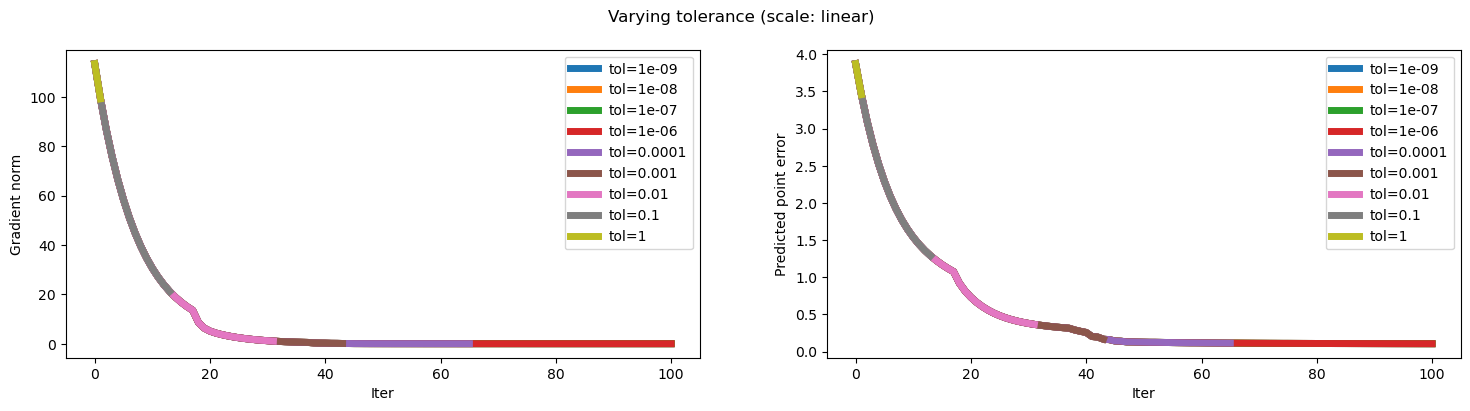

In [12]:
def testVaryingLambda(fnBuilder, input_size, x_true, scale="linear", n=5, k_max=500, try_lambda=[0, 0.1, 0.2, 0.3, 0.5, 0.7, 1]):
    plt.figure(figsize=(18, 4))
    plt.suptitle(f"Varying lambda (scale: {scale})")
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)
    for lamb in try_lambda:
        f, grad_f, x_true, input_size = fnBuilder(n=n, lamb=lamb)
        history_x, curr_k, history_f, history_grad, history_err = gd(f, grad_f, np.zeros((input_size,)), k_max, 1e-6, 1e-6, None)
        ax1.plot(range(0, len(history_err)), history_err, label=f"lamb={lamb}")
        ax2.plot(range(0, len(history_x)), [np.linalg.norm(x - x_true, 2) for x in history_x], label=f"lamb={lamb}")
    ax1.set_xlabel("Iter")
    ax1.set_ylabel(f"Gradient norm")
    ax1.set_yscale(scale)
    ax1.legend()
    ax2.set_xlabel("Iter")
    ax2.set_ylabel("Predicted point error")
    ax2.set_yscale(scale)
    ax2.legend()
    plt.show()


n = 5
print(f"{'>'*40}\n   n = {n}\n{'>'*40}")
f, grad_f, x_true, input_size = testCase4(n, lamb=0.2)
testVaryingLambda(testCase4, input_size, x_true, n=n)
testVaryingAlpha(f, grad_f, input_size, x_true, try_alpha=[0.01, 0.05, 0.1, 0.2, None])
testVaryingAlpha(f, grad_f, input_size, x_true, try_alpha=[0.2, 0.25, 0.3, 0.4, 0.5], scale="log")
testVaryingX0(f, grad_f, input_size, x_true)
testVaryingTolerance(f, grad_f, input_size, x_true)

n = 10
print(f"{'>'*40}\n   n = {n}\n{'>'*40}")
f, grad_f, x_true, input_size = testCase4(n, lamb=0.2)
testVaryingLambda(testCase4, input_size, x_true, n=n)
testVaryingAlpha(f, grad_f, input_size, x_true, try_alpha=[0.01, 0.05, None])
testVaryingAlpha(f, grad_f, input_size, x_true, try_alpha=[0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5], scale="log")
testVaryingX0(f, grad_f, input_size, x_true)
testVaryingTolerance(f, grad_f, input_size, x_true)

n = 15
print(f"{'>'*40}\n   n = {n}\n{'>'*40}")
f, grad_f, x_true, input_size = testCase4(n, lamb=0.2)
testVaryingLambda(testCase4, input_size, x_true, n=n)
testVaryingAlpha(f, grad_f, input_size, x_true, try_alpha=[0.01, 0.05, None])
testVaryingAlpha(f, grad_f, input_size, x_true, try_alpha=[0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5], scale="log")
testVaryingX0(f, grad_f, input_size, x_true)
testVaryingTolerance(f, grad_f, input_size, x_true)

## Test case 5 (non-convex function)

\begin{equation*}
    f(x) = x^4 + x^3 - 2x^2 - 2x
\end{equation*}

\begin{equation*}
    \nabla f(x) = 4x^3 + 3x^2 - 4x - 2
\end{equation*}

In [13]:
def plotSteps(fn, grad_fn, x0, try_alpha=[0.01, 0.05, 0.1, None]):
    plt.figure(figsize=(20, 4))
    plt.suptitle(f"x0 = {x0}")
    for i, alpha in enumerate(try_alpha):
        history_x, curr_k, history_f, history_grad, history_err = gd(fn, grad_fn, x0, 500, 1e-6, 1e-6, alpha)
        plt.subplot(math.ceil(len(try_alpha)/4), 4, i+1)
        plt.title(f"alpha={alpha}")
        plt.plot(np.linspace(-3, 3, 1000), fn(np.linspace(-3, 3, 1000)))
        plt.plot(history_x[0], fn(np.array(history_x[0])), "s", color="green", label="x0")
        plt.plot(history_x[1:-1], fn(np.array(history_x[1:-1])), ".")
        plt.plot(history_x[-1], fn(history_x[-1]), "X", color="darkred", label="x_pred")
        plt.legend()
    plt.show()

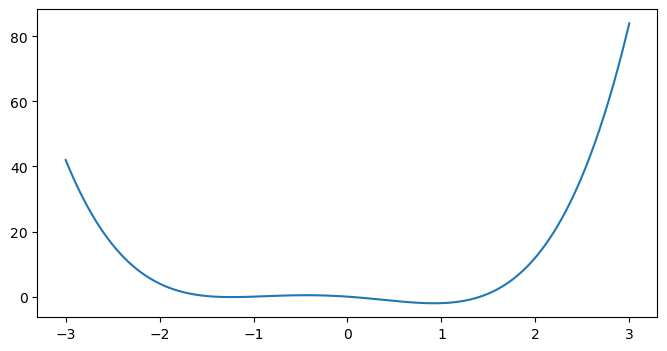

In [14]:
f, grad_f, x_true, in_size = testCase5()

x_axis = np.linspace(-3, 3, 1000)
y_axis = f(x_axis)
plt.figure(figsize=(8, 4))
plt.plot(x_axis, y_axis)
plt.show()

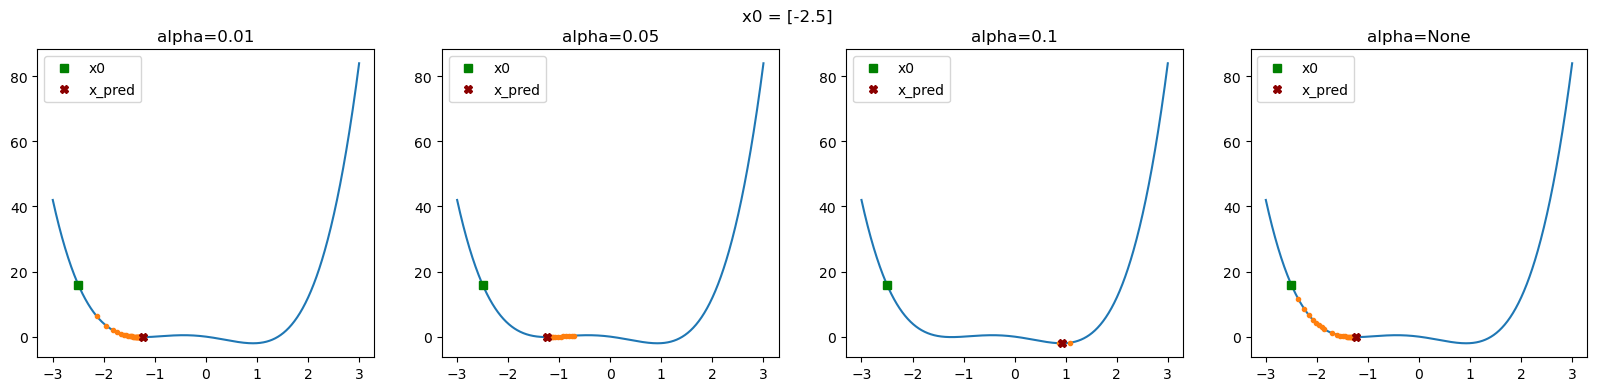

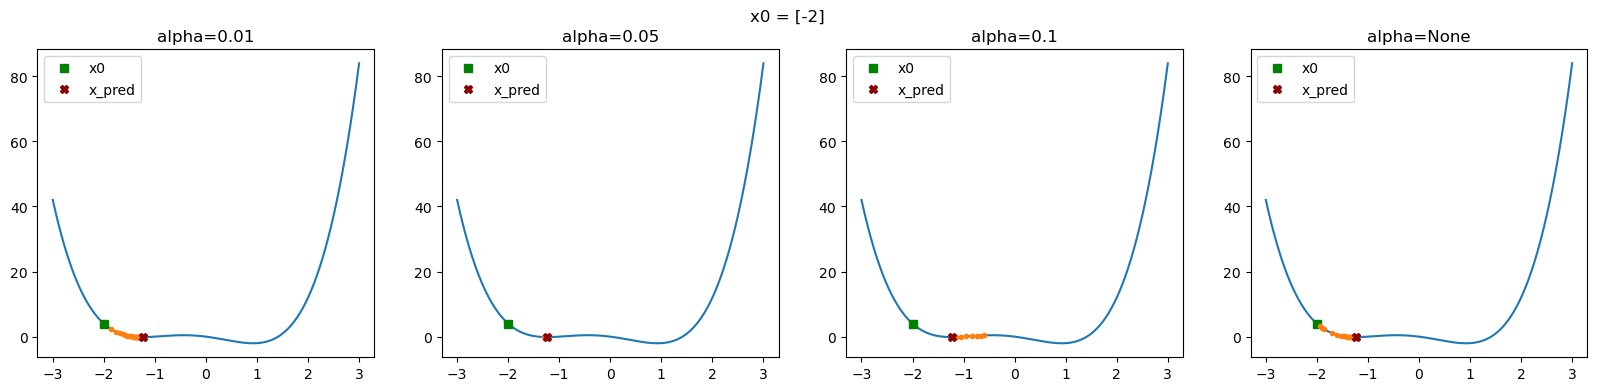

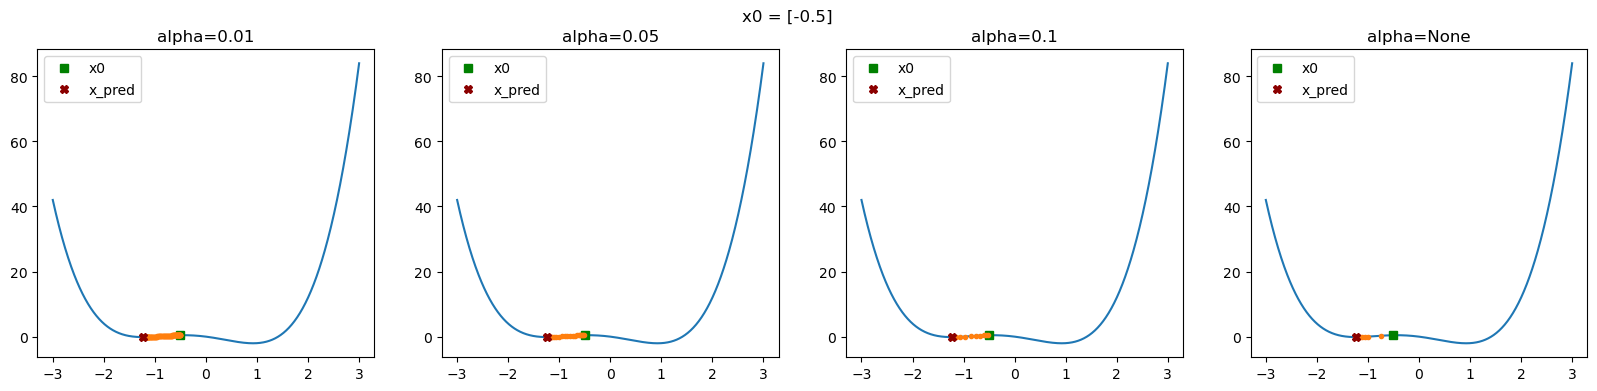

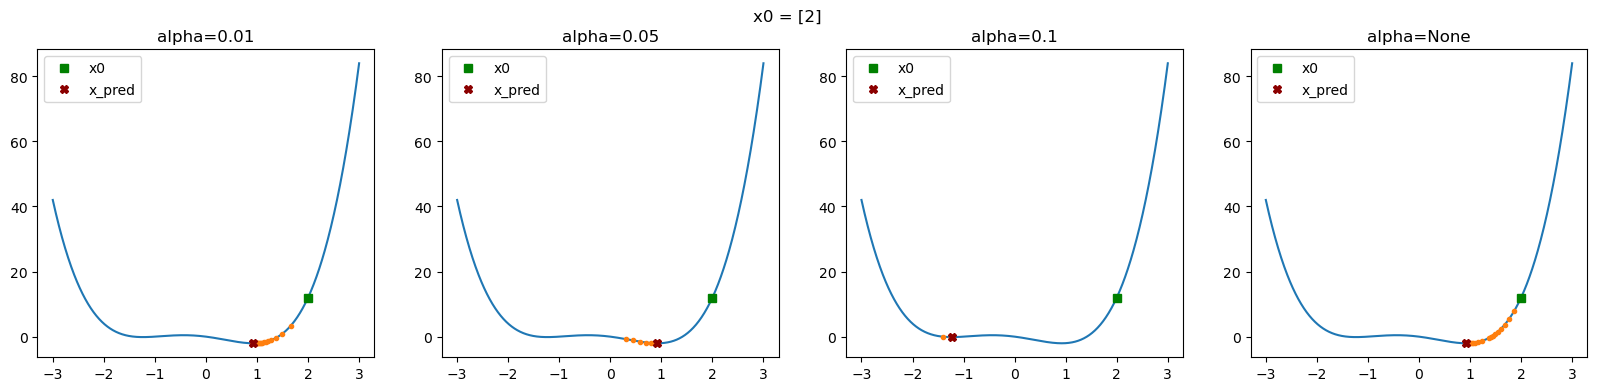

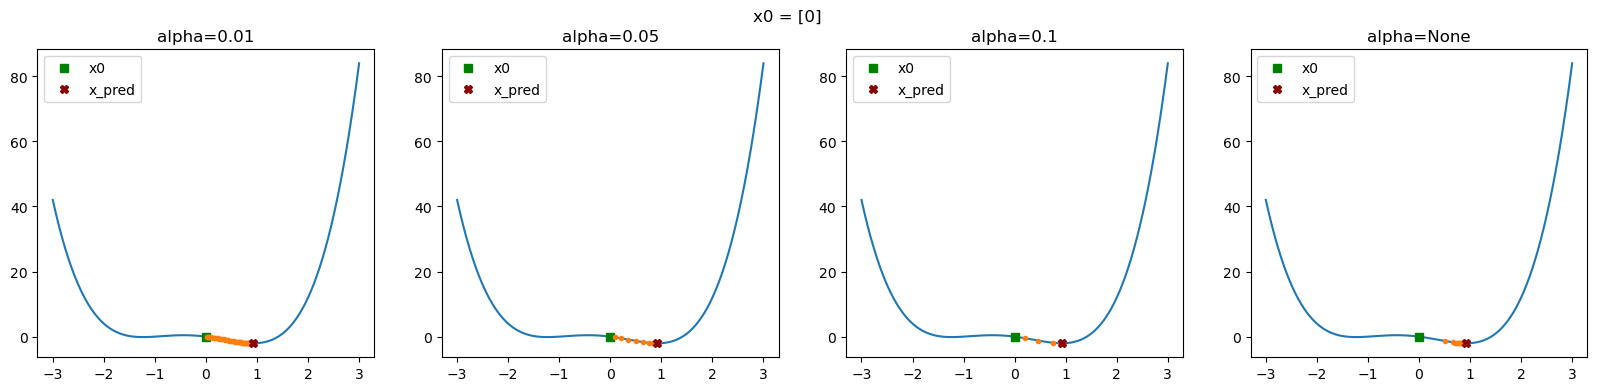

In [15]:
plotSteps(f, grad_f, np.array([-2.5]))
plotSteps(f, grad_f, np.array([-2]))
plotSteps(f, grad_f, np.array([-0.5]))
plotSteps(f, grad_f, np.array([2]))
plotSteps(f, grad_f, np.array([0]))